<a href="https://colab.research.google.com/github/Hjarrar14/Hjarrar14/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediciton of Product Sales

- Author: Hisham Jarrar

##Project Overview

##Load and Inspect Data

In [4]:
import pandas as pd
import numpy as np
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [7]:
df =pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df[df['Item_Identifier']=='DRC01']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2272,DRC01,5.92,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760
2927,DRC01,NaN,Regular,0.019107,Soft Drinks,48.4692,OUT027,1985,Medium,Tier 3,Supermarket Type3,1034.6532
5029,DRC01,5.92,Regular,0.019239,Soft Drinks,49.8692,OUT045,2002,NaN,Tier 2,Supermarket Type1,1133.1916
5077,DRC01,5.92,Regular,0.019200,Soft Drinks,47.7692,OUT046,1997,Small,Tier 1,Supermarket Type1,492.6920
5218,DRC01,5.92,Regular,0.019184,Soft Drinks,50.3692,OUT013,1987,High,Tier 3,Supermarket Type1,591.2304


##Clean Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
obj_col = df.select_dtypes('object').columns
obj_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
df.loc[:,obj_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [12]:
num_col =df.select_dtypes('number').columns

In [13]:
df.loc[:,num_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [14]:
duplicate_row = df.duplicated()
duplicate_row.sum()

np.int64(0)

In [15]:
null_value = df.isna().sum()
null_value

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [16]:
null_value/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [17]:
df[obj_col].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [18]:
df[obj_col] = df[obj_col].fillna('MISSING')
df[obj_col].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [19]:
df[num_col].isna().sum()

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [20]:
df[num_col] = df[num_col].fillna(-1)
df[num_col].isna().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [21]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [22]:
df[obj_col].nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,4
Outlet_Location_Type,3
Outlet_Type,4


In [23]:
for col in obj_col:
  print(f'the value counts for {col}')
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

the value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


the value counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


the value counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


the value counts for Outlet_Identifier
Outlet_Identifier
OUT0

In [24]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [25]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'Low Fat' : 'low fat',
    'Regular' : 'regular',
    'LF' : 'low fat',
    'reg' : 'regular'
})

In [26]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
low fat,5517
regular,3006


In [27]:
for col in num_col:
  print(f'the describe of the {col}')
  print(df[col].describe())
  print('\n')

the describe of the Item_Weight
count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


the describe of the Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


the describe of the Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


the describe of the Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


the describe of the Item_O

##Exploratory Data Analysis

In [28]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Show data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
df[num_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##Histograms plot

to view the distributions of numerical features

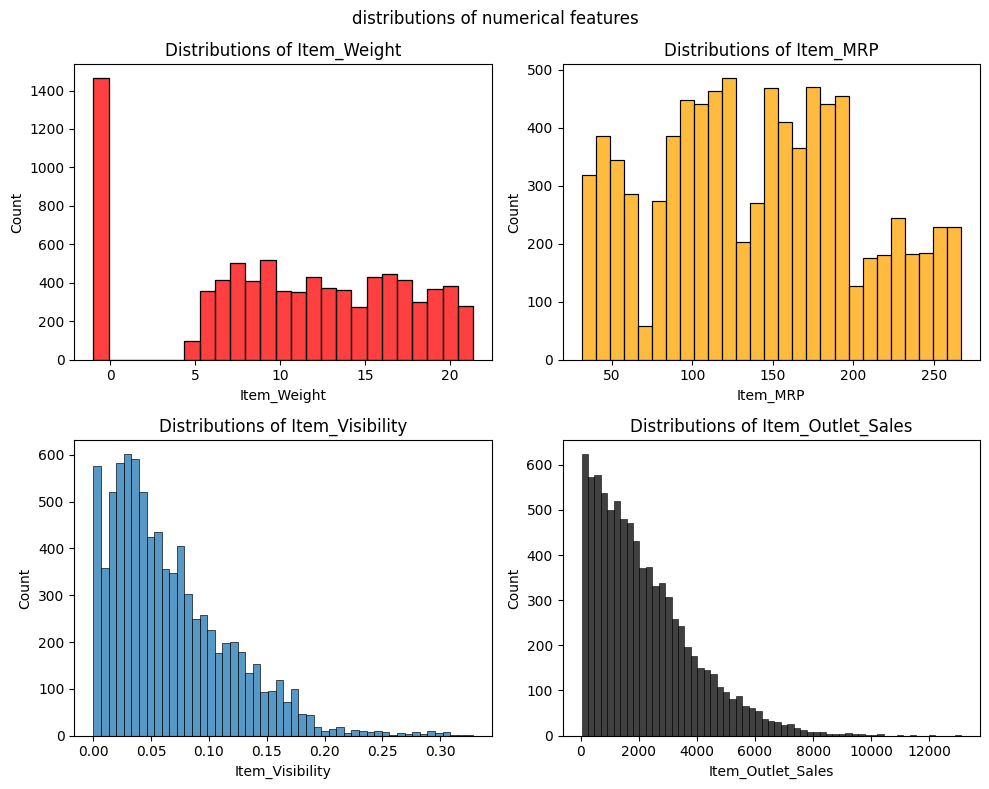

In [32]:
## Creating subplots with 2 rows and 2 columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
#subplot 0,0 (top-left)
sns.histplot(data=df ,x ='Item_Weight',
             bins='auto',color='red',edgecolor='black',ax=axes[0,0])
axes[0,0].set_title('Distributions of Item_Weight')
#subplot 0,1 (top-right)
sns.histplot(data=df ,x ='Item_MRP',
             bins='auto',color='orange',edgecolor='black',ax=axes[0,1])
axes[0,1].set_title('Distributions of Item_MRP')
#subplot 1,0 (bottom-left)
sns.histplot(data=df ,x ='Item_Visibility',
             bins='auto',edgecolor='black',ax=axes[1,0])
axes[1,0].set_title('Distributions of Item_Visibility')
#subplot 1,1 (bottom-Right)
sns.histplot(data=df ,x ='Item_Outlet_Sales',
             bins='auto',color='black',edgecolor='black',ax=axes[1,1])
axes[1,1].set_title('Distributions of Item_Outlet_Sales')
#figure title and fixing overlap
fig.suptitle('distributions of numerical features')
fig.tight_layout()
fig.savefig('Distributions_jpg')

##Boxplots
to view statistical summaries of numerical features

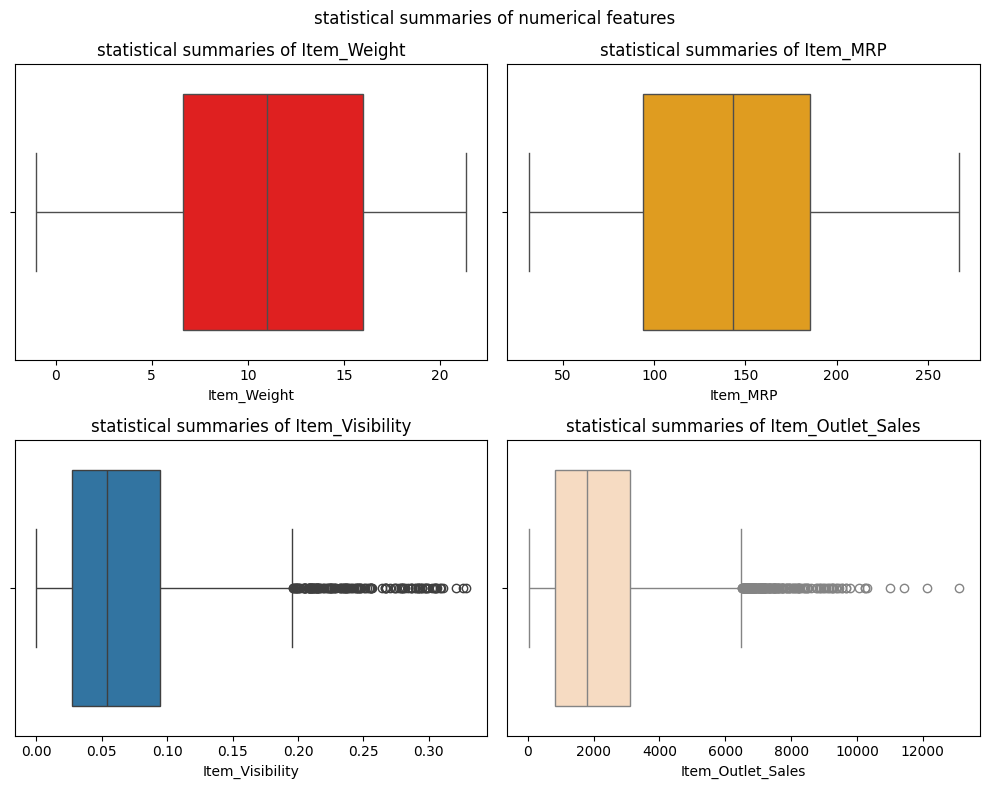

In [33]:
## Creating subplots with 2 rows and 2 columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
#subplot 0,0 (top-left)
sns.boxplot(data=df ,x ='Item_Weight',
             color='red',ax=axes[0,0])
axes[0,0].set_title('statistical summaries of Item_Weight')
#subplot 0,1 (top-right)
sns.boxplot(data=df ,x ='Item_MRP',
             color='orange',ax=axes[0,1])
axes[0,1].set_title('statistical summaries of Item_MRP')
#subplot 1,0 (bottom-left)
sns.boxplot(data=df ,x ='Item_Visibility',
             ax=axes[1,0])
axes[1,0].set_title('statistical summaries of Item_Visibility')
#subplot 1,1 (bottom-Right)
sns.boxplot(data=df ,x ='Item_Outlet_Sales',
            color='peachpuff',ax=axes[1,1])
axes[1,1].set_title('statistical summaries of Item_Outlet_Sales')
#figure title and fixing overlap
fig.suptitle('statistical summaries of numerical features')
fig.tight_layout()
fig.savefig('Statistical2.jpg')

##Countplots

to view the frequency of each class of categorial features

In [34]:
df[obj_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,low fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,low fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,low fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


<ipython-input-35-374486d39cf4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation =45,ha='right');


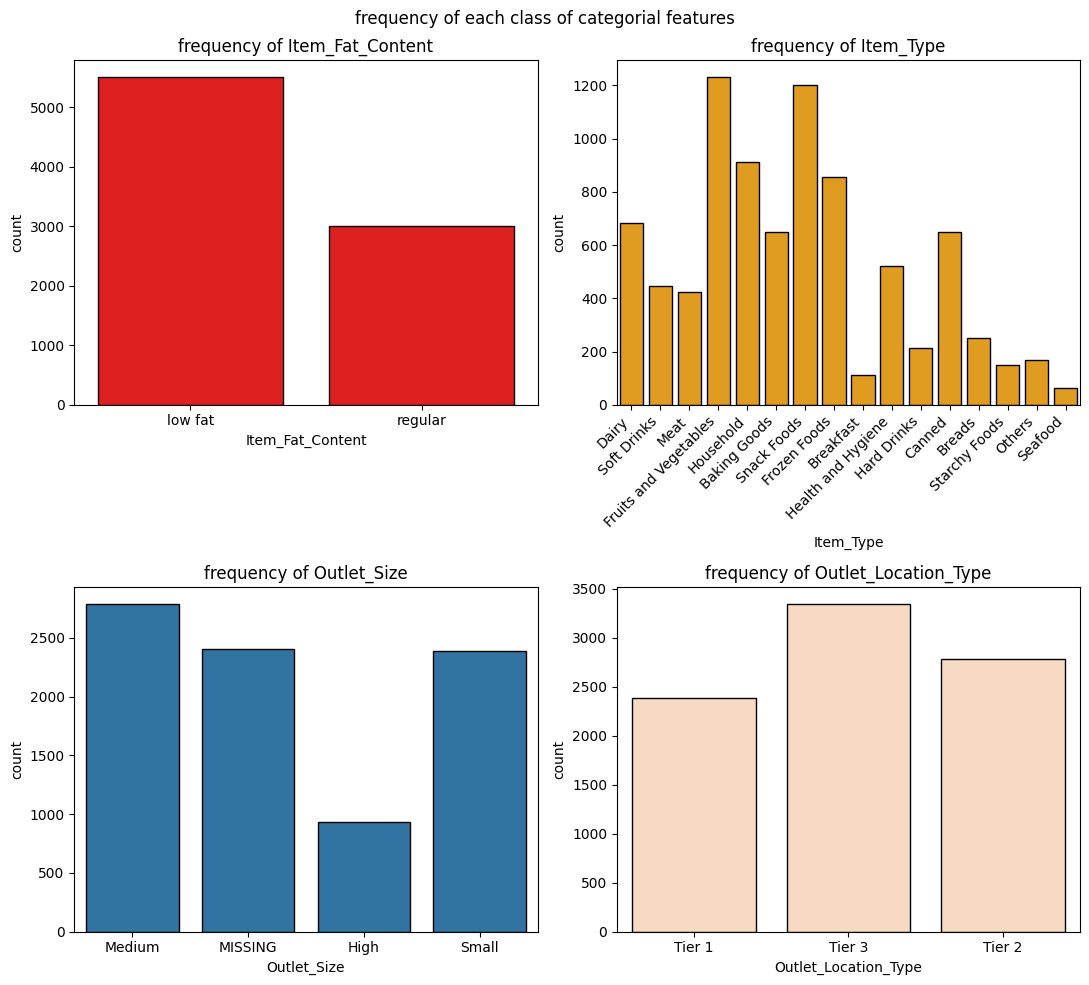

In [35]:
from pydoc import plain
## Creating subplots with 2 rows and 2 columns
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(11,10))
#subplot 0,0 (top-left)
sns.countplot(data=df ,x ='Item_Fat_Content',
              edgecolor='black',color='red',ax=axes[0,0])
axes[0,0].set_title('frequency of Item_Fat_Content')
#subplot 0,1 (top-right)
sns.countplot(data=df ,x ='Item_Type',
              edgecolor='black',color='orange',ax=axes[0,1])
axes[0,1].tick_params(axis='x',rotation =45)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation =45,ha='right');
axes[0,1].set_title('frequency of Item_Type')
#subplot 1,0 (bottom-left)
sns.countplot(data=df ,x ='Outlet_Size',
             edgecolor='black',ax=axes[1,0])
axes[1,0].set_title('frequency of Outlet_Size')
#subplot 1,1 (bottom-Right)
sns.countplot(data=df ,x ='Outlet_Location_Type',
            edgecolor='black',color='peachpuff',ax=axes[1,1])
axes[1,1].set_title('frequency of Outlet_Location_Type')
#figure title and fixing overlap
fig.suptitle('frequency of each class of categorial features')
fig.tight_layout()
fig.savefig('frequency.jpg')

##Heatmap
to view the correlation between features.


In [36]:
#Calculate correlation
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


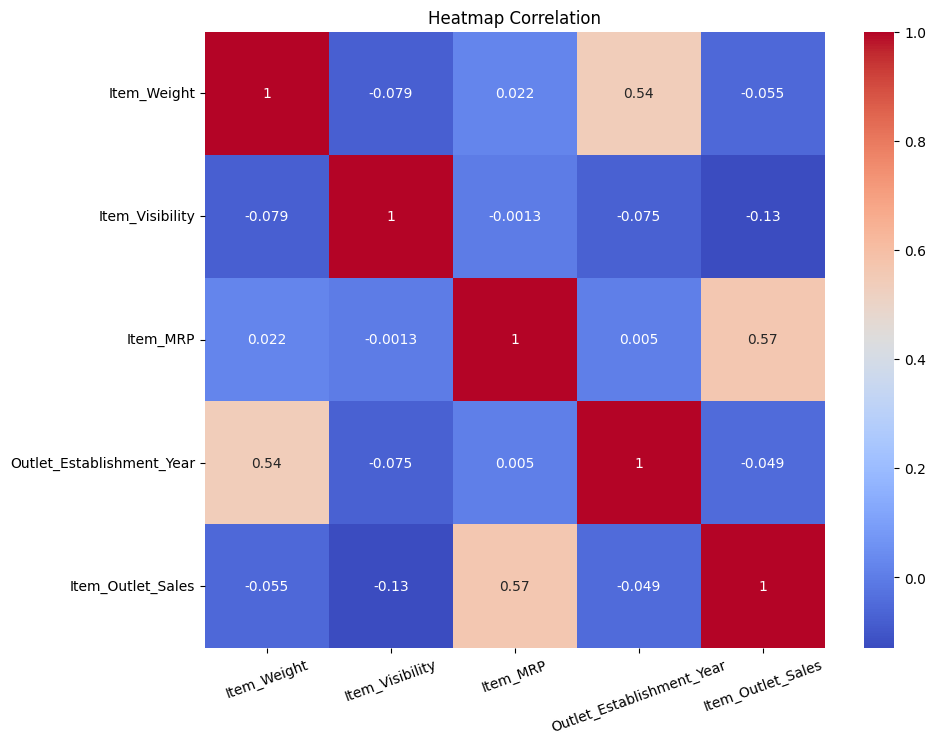

In [37]:
# Make a hetmap of correlations
fig ,ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(data=corr,cmap='coolwarm',annot=True)
ax.set_title('Heatmap Correlation')
ax.set_xticklabels(ax.get_xticklabels(),rotation =20,ha='center');
fig.savefig('Heatmap.jpg')

<ipython-input-38-9f41ce4e633c>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation =45,ha='right');
<ipython-input-38-9f41ce4e633c>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation =45,ha='right');


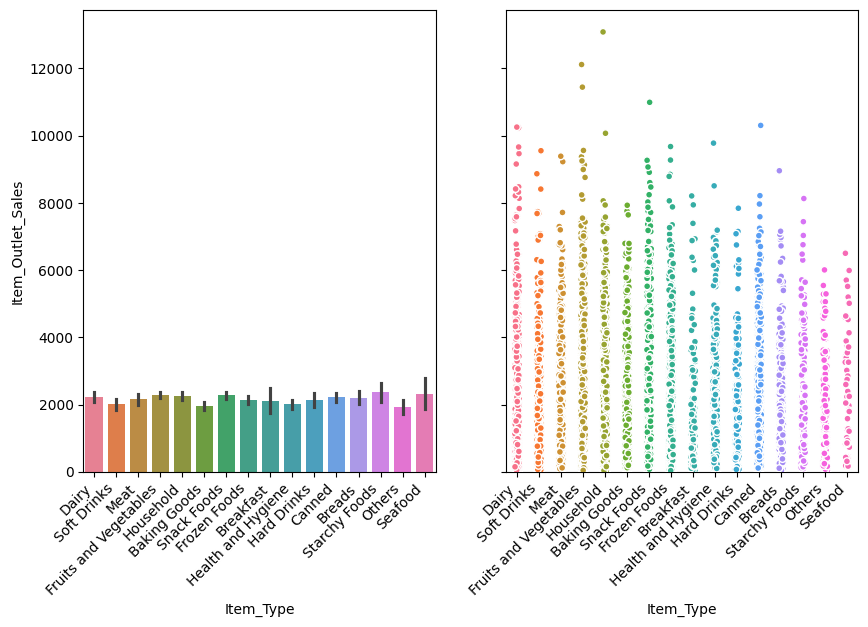

In [38]:
fig,ax = plt.subplots(ncols=2 , sharey=True , figsize=(10,6))
sns.barplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',hue='Item_Type',
            ax=ax[0])
sns.stripplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',hue='Item_Type',
            edgecolor='white',linewidth=1,ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation =45,ha='right');
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation =45,ha='right');


<ipython-input-39-a447da57f317>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =45,ha='right');


Text(0.5, 1.0, 'Item_Type VS Item_Outlet_Sales')

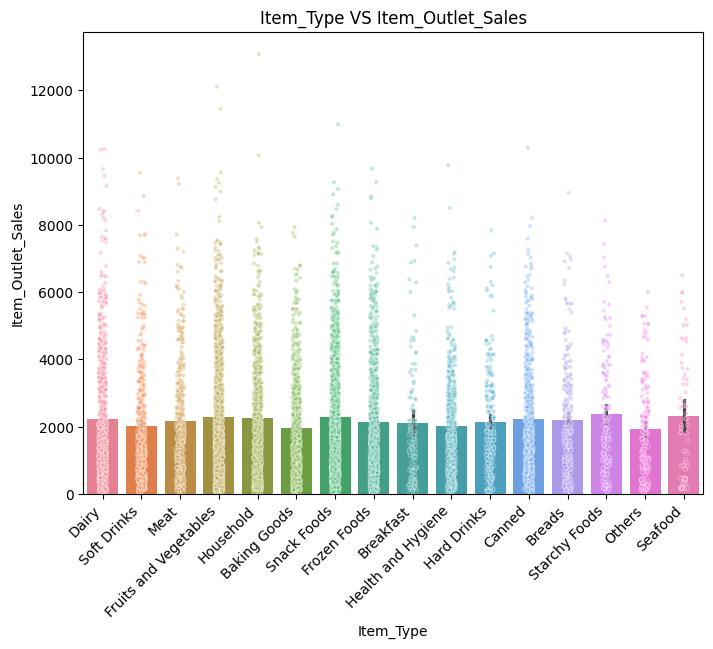

In [39]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',
            hue='Item_Type')
sns.stripplot(data = df ,x ='Item_Type',y='Item_Outlet_Sales',hue='Item_Type',
            edgecolor='white',linewidth=.8,s=3,alpha=.3,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45,ha='right');
ax.set_title('Item_Type VS Item_Outlet_Sales')

##Feature Inspection

In [40]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [41]:
df['Outlet_Size'] = df['Outlet_Size'].replace('NaN',None)
df['Outlet_Size'].isna().sum()

np.int64(0)

In [42]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
df['Item_Weight'] = df['Item_Weight'].replace(-1,np.nan)
df['Item_Weight'].isna().sum()

np.int64(1463)

In [44]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# EDA Functions

## Univariate EDA Functions

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax,
                hue=x,order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  if ax.get_legend():
      ax.legend_.remove()
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"\n- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100



  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes




## Multivariate Feature vs. Target Functions.

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vs_target(df,x,y='Item_Outlet_Sales',figsize=(6,4),
                               fillna = True, placeholder = 'MISSING',
                               order=None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Fillna with placeholder
  if fillna==True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  #or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df =temp_df.dropna(subset=[x])

  # Create the figure and subplots
  fig,ax = plt.subplots(figsize=figsize)


    # Barplot
  sns.barplot(data=temp_df,x=x,y=y,ax=ax,order=order,hue=x,alpha=0.6,
              linewidth=1,edgecolor='black',errorbar=None)

    # Boxplot
  sns.stripplot(data=temp_df,x=x,y=y,hue=x,ax=ax,
                order=order,hue_order=order,legend=False,
                edgecolor='white',linewidth=0.5,size=3,
                zorder=0)
    # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
  if ax.get_legend():
      ax.legend_.remove()

    # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig,ax



def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):

    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]

    # Plot the data
    fig, ax = plt.subplots(figsize=figsize)
    scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
    sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

    # Make sure the plot is shown before the print statement
    plt.show()

    return fig, ax

In [47]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


- Define your target column:
  - Item_Outlet_Sales

#Inspecting Each Feature

### Inspecting:{Item_Weight}

- Feature Name: definition from data dictionary.
  - Category defintions (if categorical)
  

In [48]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

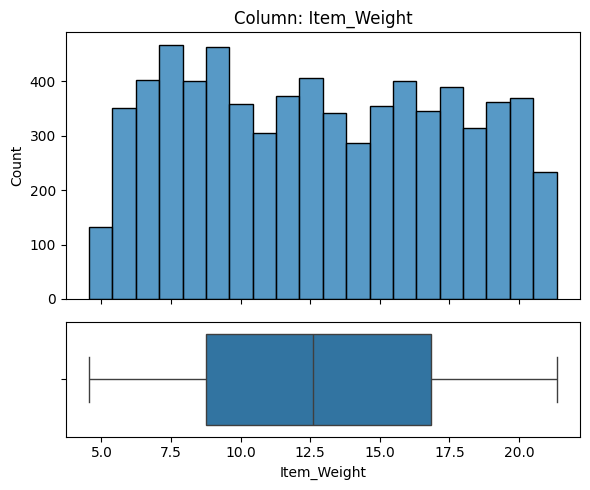

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [49]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  -  I should try to determine if they are missing at random or if there is meaning in the fact that they are missing.
  




In [50]:
fillter= df['Item_Weight'].isna()
df2=df[fillter]
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [51]:
df2['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDP11,2
FDA36,2
FDQ13,2
FDG02,2
FDX03,2
...,...
FDM44,1
FDZ48,1
FDK41,1


In [52]:
df[df['Item_Identifier']=='FDG02']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
73,FDG02,7.855,low fat,0.011325,Canned,189.6188,OUT017,2007,MISSING,Tier 2,Supermarket Type1,2285.0256
134,FDG02,7.855,low fat,0.011307,Canned,188.5188,OUT018,2009,Medium,Tier 3,Supermarket Type2,952.0940
1606,FDG02,7.855,low fat,0.011261,Canned,189.5188,OUT046,1997,Small,Tier 1,Supermarket Type1,1904.1880
2557,FDG02,NaN,low fat,0.011207,Canned,191.4188,OUT027,1985,Medium,Tier 3,Supermarket Type3,3998.7948
8449,FDG02,NaN,low fat,0.019717,Canned,191.9188,OUT019,1985,Small,Tier 1,Grocery Store,571.2564


In [53]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

  - We can impute the missing values based on Item Type and check if they have the same weight.

  - We will impute the missing values with the mean based on the item type, as according to the chart above, the feature’s data distribution has no outlier values.

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

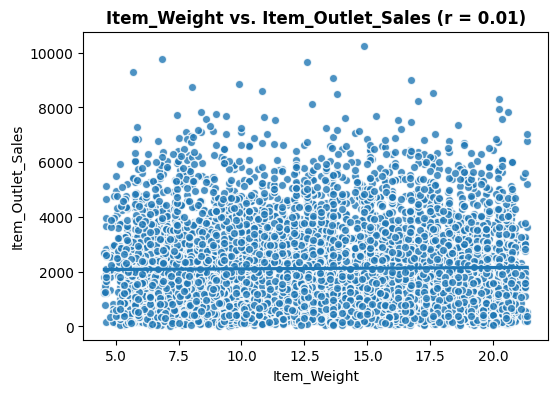

In [54]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Possibly, I believe that the lighter the item, the higher the purchase rate, as it costs less in terms of shipping.`?
  - Does this feature appear to be a predictor of the target?
    - `No, because the relationship between the item’s weight and the target feature is weak, with r = 0.01. `

___

### Inspecting: {Item_Fat_Content}

- Item_Fat_Content:
	 - Whether the product is low-fat or regular
  

In [55]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-45-991a2261f58e>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


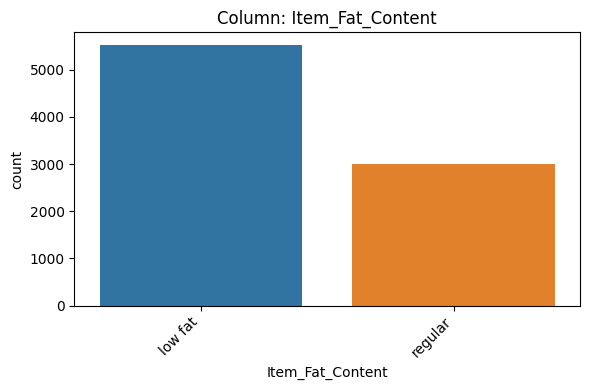


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [56]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  - not need to impute
3. Is the feature constant or quasi-constant?
  - No, the most common value only occurs in 64% of the values. The threshold for quasi-constant is more than 98%.

4. What is the cardinality? Is it high?
  - low (2)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, I believe it is useful because it depends on the customer’s preference regarding fat content.



<ipython-input-46-959dc9cf17ca>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


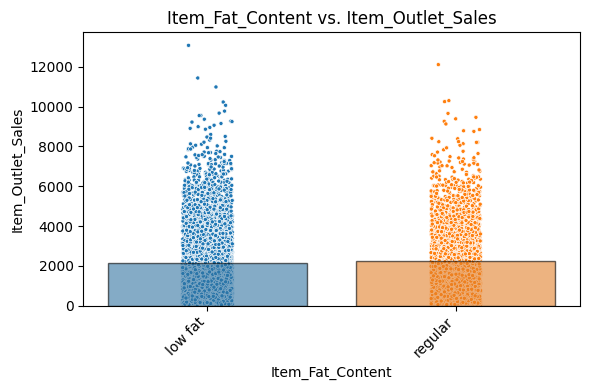

In [57]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `It is possible, depending on the customer’s preference.`
  - Does this feature appear to be a predictor of the target?
    - `No, because there is no variation between the two values.`

___

### Inspecting: {Item_Visibility}

- Item_Visibility :
  - The percentage of total display area of all products in a store allocated to the particular product
  

In [58]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

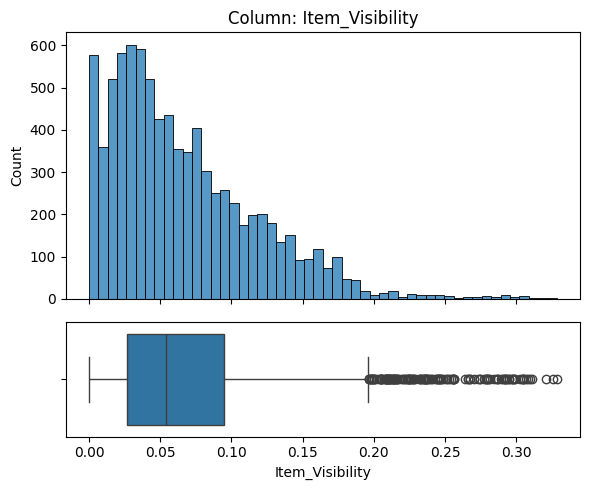

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [59]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



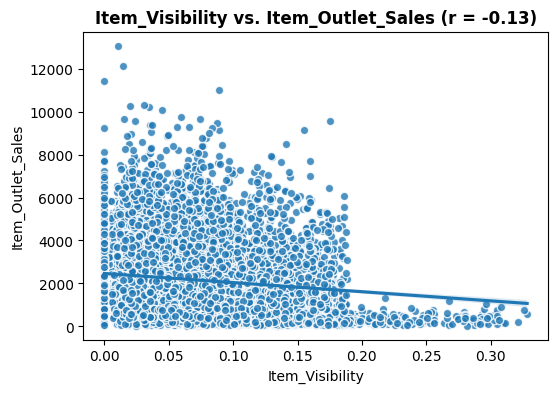

In [60]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Possibly, I believe that the more visible an item is, the higher the likelihood of it being seen and purchased, leading to an increase in item outlet sales.`?
  - Does this feature appear to be a predictor of the target?
    - `Possibly, as the data requires more processing and exploration, especially in the [0.20-0.30] range.` ?

___

In [61]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT035,930
OUT049,930
OUT046,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


### Inspecting: {Item_Type}

- Item_Type:
	- The category to which the product belongs

In [62]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-45-991a2261f58e>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


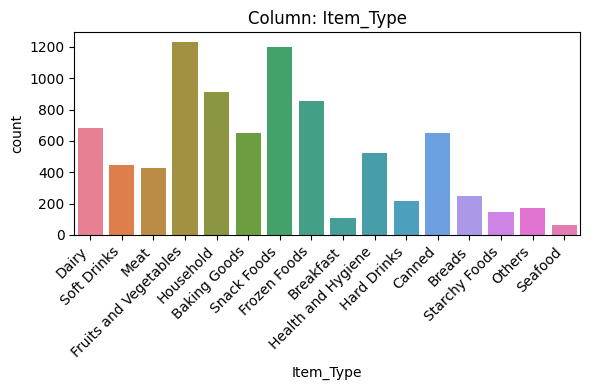


- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [63]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nall values

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - high (16)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



<ipython-input-46-959dc9cf17ca>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


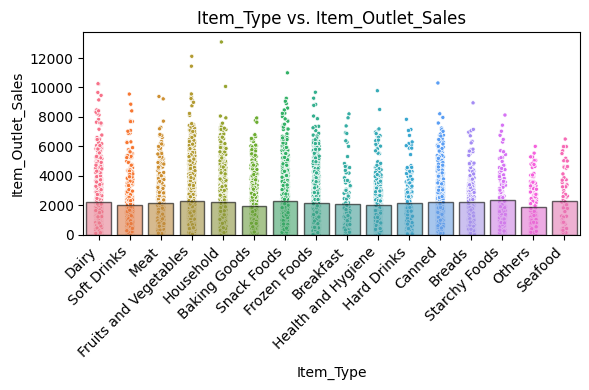

In [64]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Possibly, as it depends on the customer’s preferences.`?
  - Does this feature appear to be a predictor of the target?
    - `Possibly, as there is variation in the chart. While it is not clearly visible, it could still be useful.` ?

___

### Inspecting:{Item_MRP}

- Item_MRP :
  - Maximum Retail Price (list price) of the product
  

In [65]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

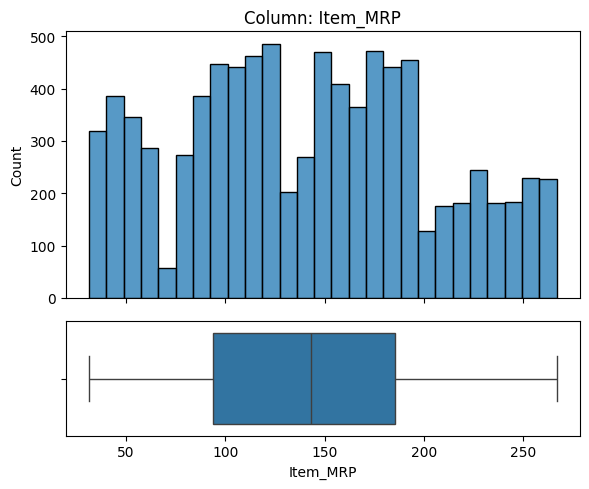

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [66]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, as I believe it could be the key factor that helps us predict the target.



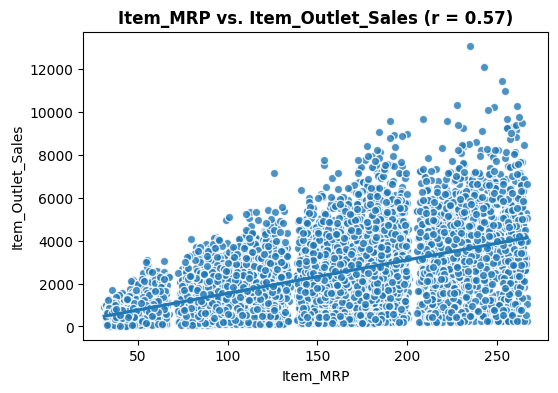

In [67]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes as I believe it could be the key factor that helps us predict the target.`?
  - Does this feature appear to be a predictor of the target?
    - `Yes, because there is a moderate positive correlation between them, with r = 0.57.` ?

___

### Inspecting:{Outlet_Size}

- Outlet_Size :
  - The size of the store in terms of ground area covered
  

In [68]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-45-991a2261f58e>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


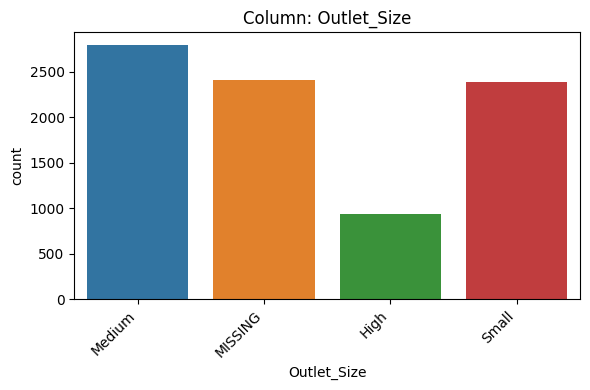


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [69]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nulls values

3. Is the feature constant or quasi-constant?
  - NO

4. What is the cardinality? Is it high?
  - low(4)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - Possibly, as the retailer may not be able to control the store size.



<ipython-input-46-959dc9cf17ca>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


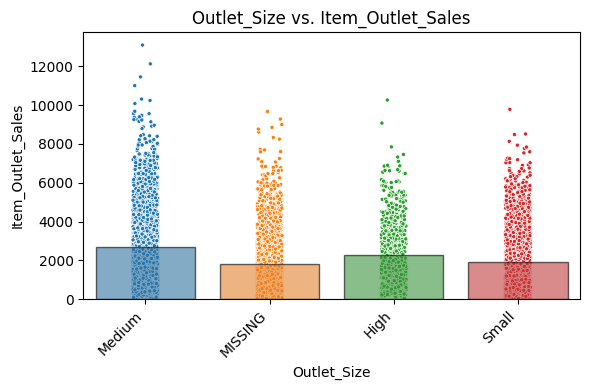

In [70]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Possibly, as I believe that the larger the store size, the more products it can sell, leading to an increase in customers and, ultimately, higher revenue.`
  - Does this feature appear to be a predictor of the target?
    - `Yes, because there is noticeable variation in the chart.`

___

### Inspecting: {Outlet_Location_Type}

- Outlet_Location_Type:
	- The type of area in which the store is located
  

In [71]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-45-991a2261f58e>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


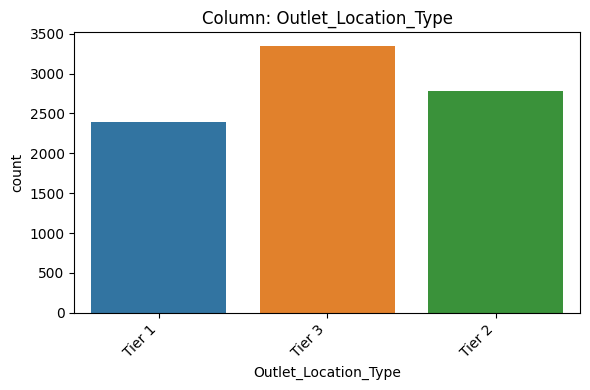


- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [72]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nalls vales

3. Is the feature constant or quasi-constant?
  - NO

4. What is the cardinality? Is it high?
  - Low(3)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, because I believe the location of the store is important, as it can help us predict sales based on whether it is in a city or rural area, reflecting the preferences of urban or rural customers.



<ipython-input-46-959dc9cf17ca>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


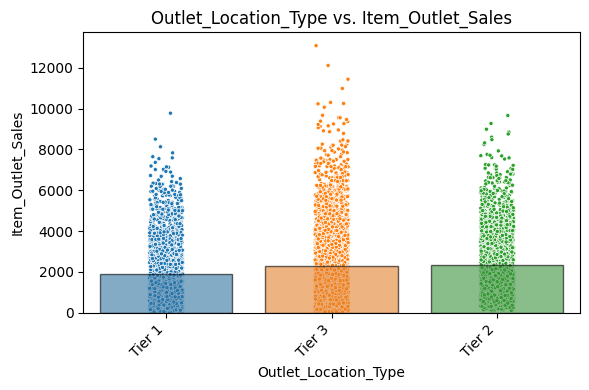

In [73]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Possibly, as it helps predict the sales preferences of the residents in each area.`
  - Does this feature appear to be a predictor of the target?
    - `Yes, because there is noticeable variation in the chart.`

___

### Inspecting: {Outlet_Type}

- Outlet_Type :
  - Whether the outlet is a grocery store or some sort of supermarket

In [74]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

<ipython-input-45-991a2261f58e>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


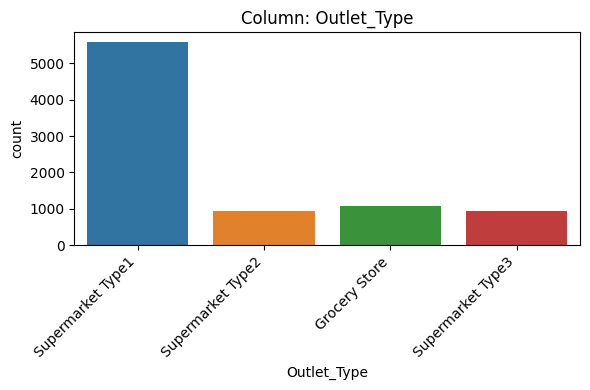


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [75]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Nall values

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Low (4)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



<ipython-input-46-959dc9cf17ca>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')


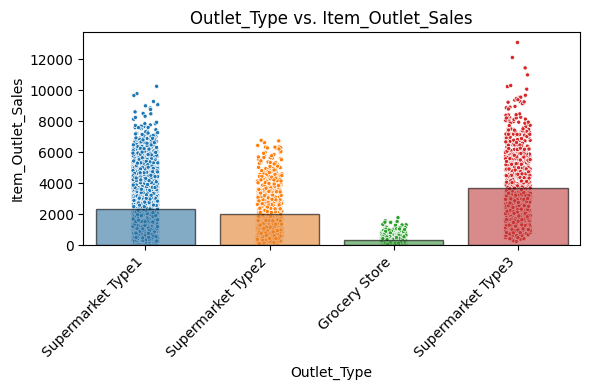

In [76]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df,feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Possibly, as the larger the store size, the more products it may sell.`
  - Does this feature appear to be a predictor of the target?
    - `Yes, because there is noticeable variation in the chart.`

___

### Inspecting: {Item_Outlet_Sales}

- Item_Outlet_Sales:
	- Sales of the product in the particular store.
  

In [77]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype

dtype('float64')

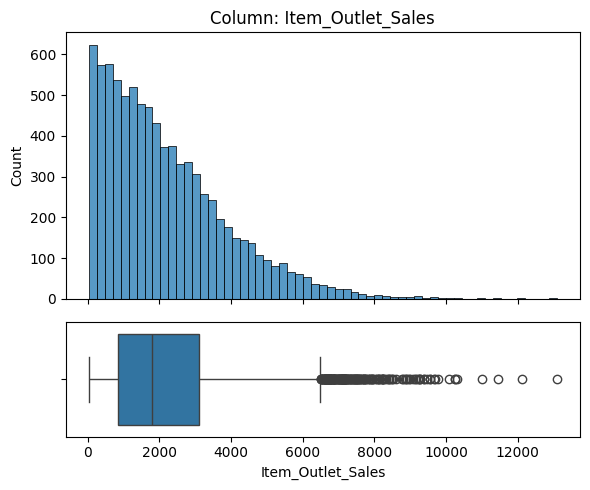

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [78]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable(numeric)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No , this is the target feature



# Preprocesing for Machine Learning

###Imports

In [79]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Reloading in the Data

In [80]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df_t = pd.read_csv(fpath)
df_t.info()
df_t.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Performing Preprocessing Steps

In [81]:
df_t.duplicated().sum()

np.int64(0)

In [82]:
obj_col = df_t.select_dtypes('object').columns
obj_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [83]:
for col in obj_col:
  print(f'the value counts for {col}')
  # print the value counts for the column
  print(df_t[col].value_counts())
  # Print an empty line for readability
  print('\n')

the value counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


the value counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


the value counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


the value counts for Outlet_Identifier
Outlet_Identifier
OUT0

In [84]:
df_t['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [85]:
df_t['Item_Fat_Content'] = df_t['Item_Fat_Content'].replace({
    'Low Fat' : 'low fat',
    'Regular' : 'regular',
    'LF' : 'low fat',
    'reg' : 'regular'
})

In [86]:
df_t['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
low fat,5517
regular,3006


## Dropping Unwanted Columns

In [87]:
# dropping the "Item_Identifier" feature due to its high cardinality.
df_t = df_t.drop(columns = 'Item_Identifier')
df_t.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Defining X and y

In [88]:
# Define features and target
X = df_t.drop(columns='Item_Outlet_Sales')
y=df_t['Item_Outlet_Sales']
# Train test split
X_train , X_test , y_train ,y_test = train_test_split(X , y , random_state=42)

In [89]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [175]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,low fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,low fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,low fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


## Column Transformers


## Workflow
After the train test split,

1) Create pathways (often pipelines, but could be single transformers) for each group of features

Define a list of features
Instantiate each transformer
Instantiate the pipeline (if using pipelines-which we will)
(NOTE: Do NOT fit and transform with each pipeline)
NEW: Define a tuple for each pathway
2) Instantiate the ColumnTransformer

3) Fit the ColumnTransformer on the training data only

4a) Transform the training data

4b) Transform the testing dat

## 1) Create Pipelines and Define Tuples
Remember the steps below to create the pipeline:

1) Define the list of features for each pipeline

2) Instantiate the transformers for the pipeline

3) Instantiate the pipeline

We will not fit and transform the pipelines separately as we did before. Instead, we will define a tuple for use with the column transformer.

Please note that we will create the pipelines below with streamlined code. For more details on each step, please refer to the pipelines lesson.

Numeric Pipeline

Our numeric pipeline will:

1) Impute missing values with the median.

2) Scale the data.



### numeric Pipeline

In [90]:
# Proprocessing pipline for numeric data
# Save list of column names
num_cols = X_train.select_dtypes('number').columns
num_cols = num_cols.drop('Outlet_Establishment_Year')
print('Numeric Coulmns:' ,num_cols)
# Instantiate proprocessors
impute_mean = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipline
num_pipe = make_pipeline(impute_mean,scaler)
num_pipe

Numeric Coulmns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

## Define Numeric Tuple for ColumnTransformer

In [91]:
# Making a numeric tuple for columnsTransformer
num_tuple= ('numeric',num_pipe,num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

### Ordinal Pipeline

Our ordinal pipeline will:

1) Impute missing values with "NA".

2) Encode the features ordinally.

3) Scale the encoded features.

In [92]:
# Preprocessing pipeline for ordinal data
# Save list of column names
ord_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']
print('Ordinal Columns:' , ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant',fill_value='NA')
# Making the OrdinalEncoder
# Specifying order of categories for our ordinal columns
item_fat_ord = ['low fat','regular']
outlet_size_ord = ['NA','Small','Medium','High']
outlet_Location_Type_ord = ['Tier 1','Tier 2','Tier 3']
outlet_type_ord = ['Grocery Store','Supermarket Type1',
                   'Supermarket Type2','Supermarket Type3']

# Making the list of order list for ordianlencoder
ordinal_category_orders = [item_fat_ord,outlet_size_ord,
                           outlet_Location_Type_ord,outlet_type_ord]

ord_encoder = OrdinalEncoder(categories= ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
# Making a ord_pipe
ord_pipe = make_pipeline(impute_na_ord,ord_encoder,scaler_ord)
ord_pipe


Ordinal Columns: ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['low fat', 'regular'],
                                            ['NA', 'Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3'],
                                            ['Grocery Store',
                                             'Supermarket Type1',
                                             'Supermarket Type2',
                                             'Supermarket Type3']])),
                ('standardscaler', StandardScaler())])

## Define Ordinal Tuple for ColumnTransformer

In [93]:
# Making an ordinal_tuple for columnTransformer
ord_tuple = ('ordinal',ord_pipe , ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['low fat', 'regular'],
                                             ['NA', 'Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3'],
                                             ['Grocery Store',
                                              'Supermarket Type1',
                                              'Supermarket Type2',
                                              'Supermarket Type3']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

### Categorical Pipeline

Our categorical pipeline will:

1) Impute missing values with "NA".

2) One-Hot-Encode the categories for each featur

In [94]:
# preprocessing pipeline for one-hot-encoded data
# save list of column names

ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
ohe_cols = list(ohe_cols)
ohe_cols.append('Outlet_Establishment_Year')
print('OneHotEncoder Columns : ', ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant',fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na,ohe_encoder)
ohe_pipe

OneHotEncoder Columns :  ['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Define Categorical Tuple for ColumnTransformer

In [95]:
ohe_tuple = ('categorical' ,ohe_pipe,ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 ['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

## instantiate the ColumnTransformer

In [96]:
col_transformer = ColumnTransformer([num_tuple,ord_tuple,ohe_tuple],verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Establishment_Year'])],
                  verbose_feature_names_out=False)

## Fit the Transformer on Training Data Only

In [97]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Type', 'Outlet_Identifier',
                                  'Outlet_Establishment_Year'])],
                  verbose_feature_names_out=False)

## Transform Training and Test data

In [98]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the test data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
4776,0.827485,-0.712775,1.828109,-0.740321,0.748125,1.084948,0.983572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7510,0.566644,-1.291052,0.603369,1.350766,0.748125,1.084948,0.983572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5828,-0.121028,1.813319,0.244541,1.350766,0.748125,-1.384777,-0.263600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,-0.740321,-0.264370,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,-0.740321,-1.276865,-0.149914,-0.263600,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
# Checking for null values
X_train_processed.isna().sum().sum()

np.int64(0)

# Modeling

### Imports for machine learning

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error , root_mean_squared_error

## Linear Regression

### Instantiate Model

In [101]:
lin_reg = LinearRegression()
linreg_pipe = make_pipeline(col_transformer,lin_reg)

### Train the Linear Regression Model on the training data

In [102]:
linreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  (...
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

### Use the model to make predictions for training and testing data

In [103]:
# Get predictions for the training data
y_predictions_train = linreg_pipe.predict(X_train)
# Get predictions for the testing data
y_predictions_test = linreg_pipe.predict(X_test)

### Function to Evaluate Model

In [104]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### Evaluate Linear Regression Model

In [105]:
## Evaluate Model performance
evaluate_regression(linreg_pipe , X_train ,y_train ,X_test , y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,092.863
- R^2 = 0.567


### Linear Regression Model Observations

> - The linear regression model achieves approximately average performance and shows a good balance between the training and testing data, as the R² value is 0.562 on the training data and 0.567 on the testing data.

> - This indicates that the model is able to explain about 56% of the variance in product sales.

## Random Forest model

### Importing Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

### Instantiate default random forest model

In [107]:
rf = RandomForestRegressor(random_state=42)
# Model Pipeline
rf_pipe = make_pipeline(col_transformer,rf)

### Train the Random Forest Model on the training data

In [108]:
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  (...
                                                   'Outlet_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### Evaluate Default Random Forest Model



In [109]:
## Evaluate Model performance
evaluate_regression(rf_pipe , X_train ,y_train ,X_test , y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.383
- MSE = 182,992.934
- RMSE = 427.777
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.103
- MSE = 1,215,476.625
- RMSE = 1,102.487
- R^2 = 0.559


### Untuned Random Forest Model Observations

> - As seen in the model performance table above, the **R²** value for the **training data** is **0.938**, while it is **0.559** for the **test data**. This indicates that the model suffers from **overfitting**, as it performs well on the training set but poorly on the test set.

### Comparison between the linear regression model and the Default random forest model on the test data

> - The linear regression model outperforms the random forest model on the test data. The linear regression model achieved a Root Mean Squared Error **(RMSE) of 1092** and an **R² score of 0.567**, which means the model is able to explain approximately **56% of the variance in sales** .

> - In comparison, the random forest model achieved an **RMSE of 1102** and an **R² score of 0.55**, indicating it can explain around **55% of the variance in sales.**

> - Additionally, the RMSE of the linear regression model is lower than that of the random forest model, which further supports its slightly better performance.

> - Overall, while both models show similar performance on the test data, the linear regression model performs slightly better. It is also worth noting that the random forest model shows signs of overfitting.

### Tuning Random Forest Model

#### Tuning with GridSearCV

In [110]:
# Import GridSearchCv
from sklearn.model_selection import GridSearchCV

In [111]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                     

In [112]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,5,10,15,20,25],
          'randomforestregressor__n_estimators':[10,20,50,70,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4,5,6],
          'randomforestregressor__max_features':[2,5,7,8,'sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }

In [113]:
#  Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe , params , n_jobs=-1 ,cv = 3,verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train,y_train)


Fitting 3 folds for each of 2940 candidates, totalling 8820 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value=...
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 15,
                                                              20, 25],
                         'randomforestregressor__max_features': [2, 5, 7, 8,
                                                                 'sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4, 5,
                                                                     6],
                         'randomforestregressor__n_estimators': [10, 20, 50, 70,
                                                                 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [114]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 20,
 'randomforestregressor__oob_score': True}

In [115]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 756.226
- MSE = 1,154,413.205
- RMSE = 1,074.436
- R^2 = 0.610

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 730.396
- MSE = 1,103,475.652
- RMSE = 1,050.464
- R^2 = 0.600


### Tuning Random Forest Model Observations

> - notice that the model's performance has improved and it no longer suffers from overfitting.

> - The R² values for the training and test data are close, with an R² of 0.610 for the training set and 0.600 for the test set.

> - This indicates an improvement in the model's performance, as the R² value of 0.600 means that the model is able to explain 60% of the variance in product sales.

# Insights for Stakeholders

## Linear Regression

In [116]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [117]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6),
                          color_dict=None, ax=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

In [118]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [119]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

In [120]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     intercept=True,name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = linreg_pipe[0].get_feature_names_out()
    ## Saving the coefficients
    coeffs = pd.Series(linreg_pipe[-1].coef_, index= feature_names,name=name)
    if intercept ==True:
      coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [170]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

In [146]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [196]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

In [121]:
evaluate_regression(linreg_pipe,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,092.863
- R^2 = 0.567


In [122]:
coeffs = get_coeffs_linreg(linreg_pipe[-1])
coeffs.sort_values(ascending=False).round(3)

,LinearRegression Coefficients
intercept,2204.045
Item_MRP,984.513
Outlet_Type,763.784
Item_Type_Seafood,308.889
Outlet_Establishment_Year_2007,224.151
Outlet_Identifier_OUT017,224.151
Outlet_Establishment_Year_2004,216.396
Outlet_Identifier_OUT035,216.396
Outlet_Identifier_OUT013,175.306
Outlet_Establishment_Year_1987,175.306


In [123]:
coeffs = get_coeffs_linreg(linreg_pipe[-1])
coeffs[:3]

,LinearRegression Coefficients
Outlet_Identifier_OUT019,-459.000461
Outlet_Establishment_Year_2009,-435.172026
Outlet_Identifier_OUT018,-435.172026


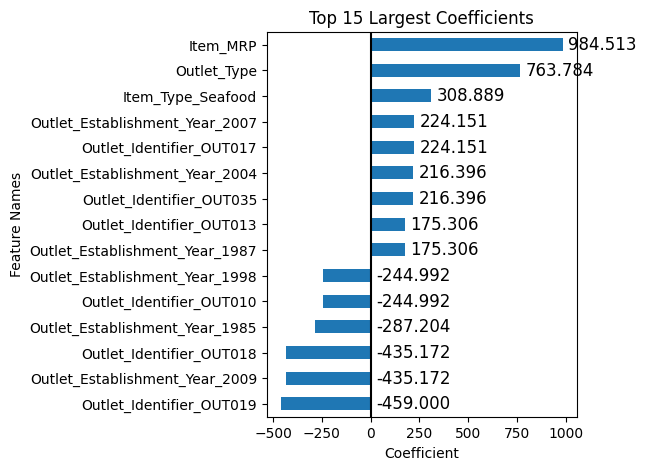

In [124]:
plot_coeffs(coeffs,top_n=15,annotate=True);

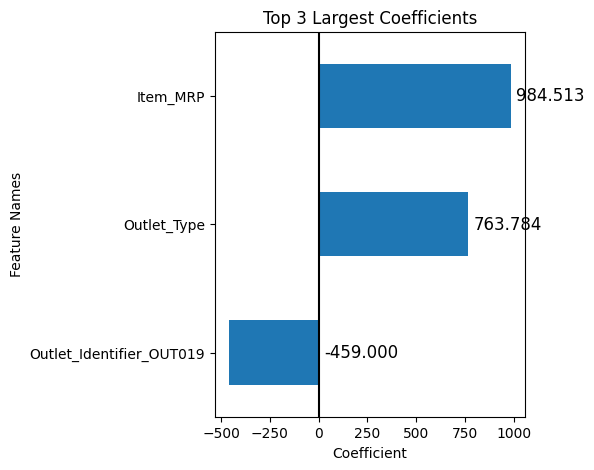

In [125]:
plot_coeffs(coeffs,top_n=3,annotate=True);

> - The top 3 largest coefficients are:

	1.	Item_MRP, with a coefficient of 984.51.
      - Since we applied linear regression on scaled data, this coefficient means that if this feature increases by 1 standard deviation, product sales increase by $984.51.
	2.	Outlet_Type, with a coefficient of 763.78.
      - An increase of 1 standard deviation in this feature leads to an increase of $763.78 in sales.
	3.	Outlet_Identifier_OUT019, with a coefficient of -459.00.
      - If this feature increases by 1 standard deviation, product sales decrease by $459.00.

## Tuning Random Forest model

In [126]:
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 756.226
- MSE = 1,154,413.205
- RMSE = 1,074.436
- R^2 = 0.610

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 730.396
- MSE = 1,103,475.652
- RMSE = 1,050.464
- R^2 = 0.600


## Feature Importance

In [171]:
importances=get_importances(rf_pipe[-1],sort=True,ascending=False)
importances

,Feature Importance
Item_MRP,0.441919
Outlet_Type,0.216160
Item_Visibility,0.099589
Item_Weight,0.052780
Outlet_Establishment_Year_1985,0.031931
Outlet_Identifier_OUT027,0.023448
Outlet_Size,0.009796
Item_Fat_Content,0.008531
Item_Type_Snack Foods,0.008180
Item_Type_Fruits and Vegetables,0.007966


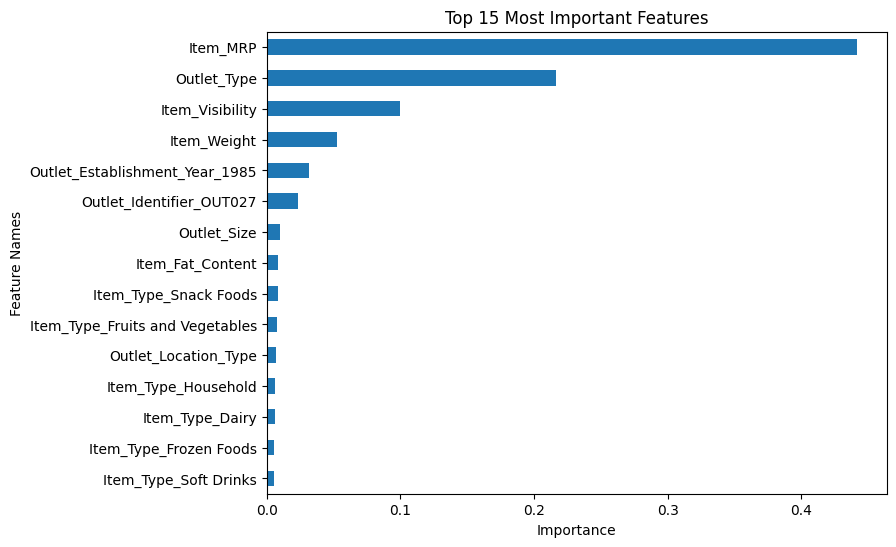

In [172]:
plot_importance(importances,top_n=15);

In [190]:
importance2 = get_importances(best_rf[-1],sort=True,ascending=False)
importance2

,Feature Importance
Item_MRP,0.55
Outlet_Type,0.37
Outlet_Establishment_Year_1985,0.04
Outlet_Identifier_OUT027,0.03
Item_Visibility,0.00
Outlet_Establishment_Year_2009,0.00
Item_Type_Household,0.00
Item_Type_Health and Hygiene,0.00
Item_Type_Soft Drinks,0.00
Item_Type_Fruits and Vegetables,0.00


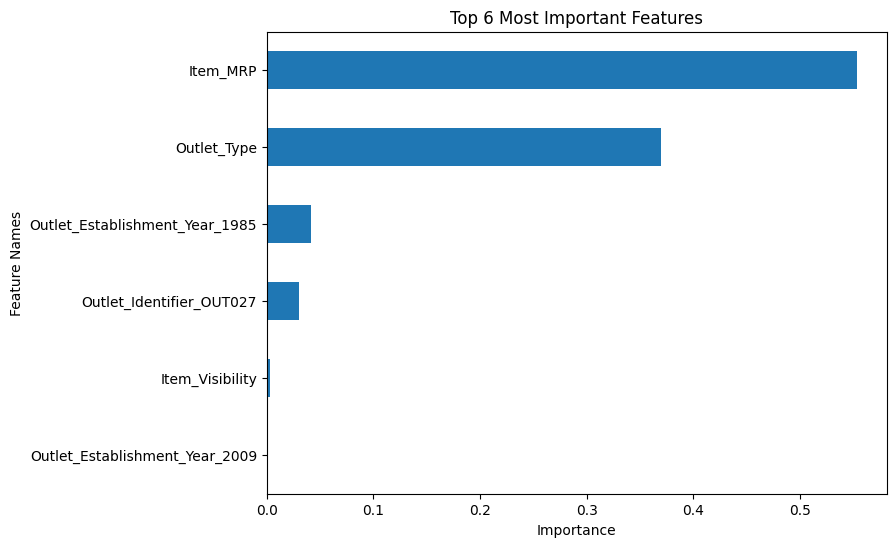

In [191]:
plot_importance(importance2,top_n=6);

## Permutation Importance

In [129]:
from sklearn.inspection import permutation_importance

In [181]:
rf_importances = permutation_importance(best_rf[-1],X_test_processed,y_test,n_repeats=5,random_state=42)
rf_importances

{'importances_mean': array([ 8.45068159e-06,  2.06630681e-04,  7.14699730e-01, -9.43758422e-06,
         1.00619574e-06,  1.02467080e-06,  4.92665881e-01,  8.22705992e-07,
         1.43996853e-06,  6.02403291e-07,  8.30933323e-06,  0.00000000e+00,
        -2.34473483e-06,  5.59400096e-05,  0.00000000e+00, -6.65016175e-05,
        -1.16135071e-04,  3.53675042e-05,  6.98203748e-07,  4.27966636e-06,
         4.12474884e-06, -8.55880587e-05,  0.00000000e+00,  2.58519309e-06,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.39707000e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.33417227e-02, -5.21554287e-05,  0.00000000e+00,
         1.19142263e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.59964933e-04]),
 'importances_std': array([2.84348415e-05, 2.60779603e-04, 2.34789395e-02, 1.93001186e-05,
        3.04639555e-07, 7.47023485e-07, 6.40413224e-03, 8.80141317e-07,
        2.711

In [179]:
rf_permutation_importances = pd.Series(rf_importances['importances_mean'],index=X_test_processed.columns,
                                       name='Permutation Importance')

rf_permutation_importances = rf_permutation_importances.sort_values(ascending=False)
rf_permutation_importances

,Permutation Importance
Item_MRP,7.146997e-01
Outlet_Type,4.926659e-01
Outlet_Establishment_Year_1985,1.334172e-02
Outlet_Identifier_OUT027,7.397070e-03
Outlet_Establishment_Year_2009,4.599649e-04
Item_Visibility,2.066307e-04
Item_Type_Fruits and Vegetables,5.594001e-05
Item_Type_Meat,3.536750e-05
Item_Weight,8.450682e-06
Item_Type_Canned,8.309333e-06


In [184]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
rf_permutation_importances

,Permutation Importance
Item_MRP,0.71
Outlet_Type,0.49
Outlet_Establishment_Year_1985,0.01
Outlet_Identifier_OUT027,0.01
Outlet_Establishment_Year_2009,0.00
Item_Visibility,0.00
Item_Type_Fruits and Vegetables,0.00
Item_Type_Meat,0.00
Item_Weight,0.00
Item_Type_Canned,0.00


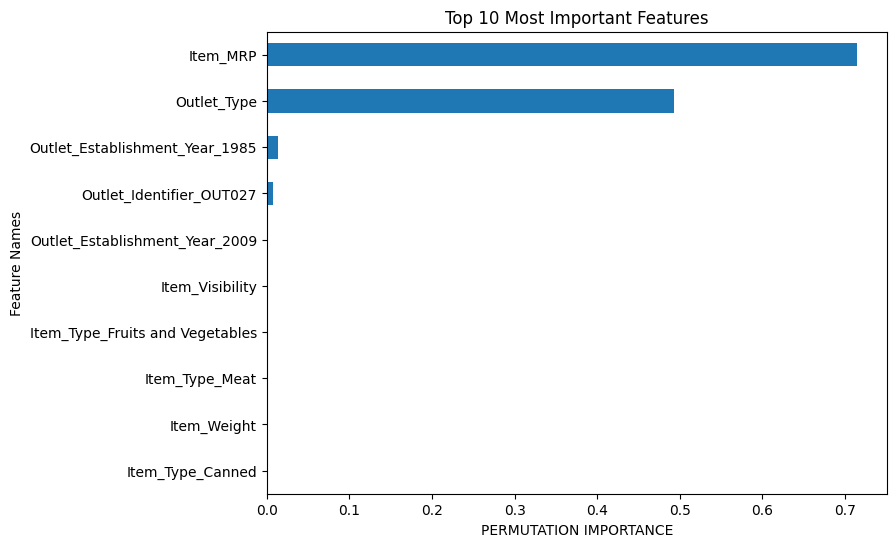

In [201]:
ax =plot_importance(rf_permutation_importances,top_n=10);
ax.set_xlabel('PERMUTATION IMPORTANCE');

In [194]:
colors_top6 = get_color_dict(importance2,top_n=6)
colors_top6

{'Item_MRP': 'green',
 'Outlet_Type': 'green',
 'Outlet_Establishment_Year_1985': 'green',
 'Outlet_Identifier_OUT027': 'green',
 'Item_Visibility': 'green',
 'Outlet_Establishment_Year_2009': 'green',
 'Item_Type_Household': '#006ba4',
 'Item_Type_Health and Hygiene': '#006ba4',
 'Item_Type_Soft Drinks': '#006ba4',
 'Item_Type_Fruits and Vegetables': '#006ba4',
 'Outlet_Establishment_Year_1987': '#006ba4',
 'Item_Weight': '#006ba4',
 'Item_Type_Meat': '#006ba4',
 'Item_Type_Canned': '#006ba4',
 'Item_Fat_Content': '#006ba4',
 'Item_Type_Frozen Foods': '#006ba4',
 'Item_Type_Snack Foods': '#006ba4',
 'Item_Type_Breakfast': '#006ba4',
 'Item_Type_Breads': '#006ba4',
 'Item_Type_Baking Goods': '#006ba4',
 'Item_Type_Others': '#006ba4',
 'Item_Type_Seafood': '#006ba4',
 'Outlet_Identifier_OUT010': '#006ba4',
 'Outlet_Establishment_Year_1998': '#006ba4',
 'Outlet_Size': '#006ba4',
 'Outlet_Location_Type': '#006ba4',
 'Outlet_Identifier_OUT017': '#006ba4',
 'Outlet_Identifier_OUT013': '#006

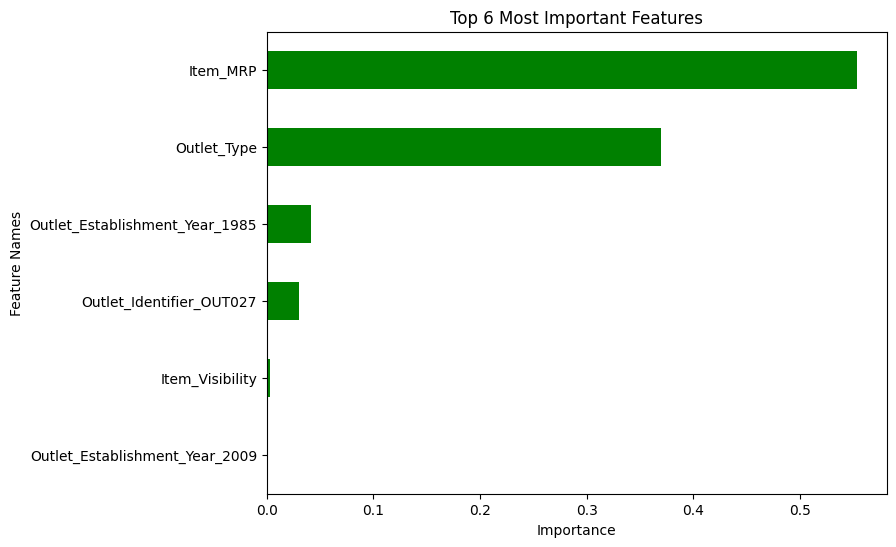

In [198]:
plot_importance_color(importance2,color_dict=colors_top6,top_n=6);

Text(0.5, 0, 'PERMUTATION IMPORTANCE')

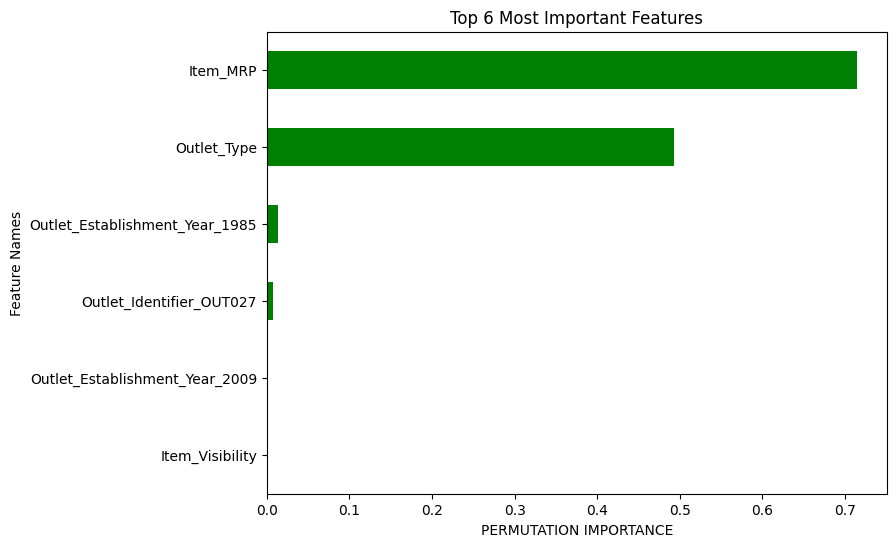

In [199]:
ax = plot_importance_color(rf_permutation_importances,color_dict=colors_top6,top_n=6);
ax.set_xlabel('PERMUTATION IMPORTANCE')

In [143]:
coeffs_rf = get_coeffs_linreg(best_rf,intercept=False,name='Random Forest Coefficients')
coeffs_rf.sort_values(ascending=False).round(3)

,Random Forest Coefficients
Item_MRP,984.513
Outlet_Type,763.784
Item_Type_Seafood,308.889
Outlet_Establishment_Year_2007,224.151
Outlet_Identifier_OUT017,224.151
Outlet_Establishment_Year_2004,216.396
Outlet_Identifier_OUT035,216.396
Outlet_Identifier_OUT013,175.306
Outlet_Establishment_Year_1987,175.306
Outlet_Identifier_OUT027,171.796


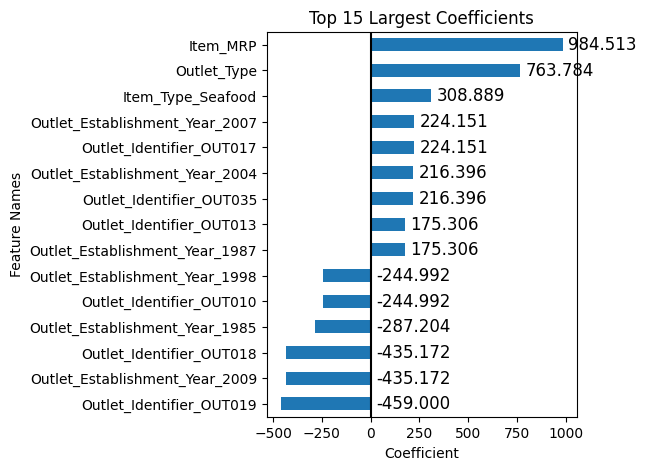

In [144]:
plot_coeffs(coeffs_rf,top_n=15,annotate=True);

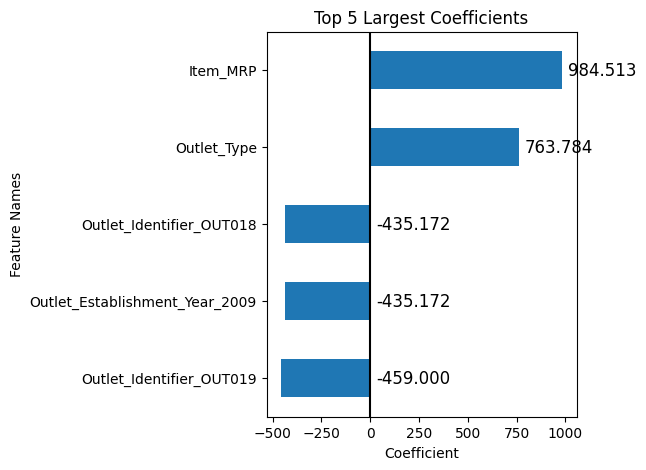

In [145]:
plot_coeffs(coeffs_rf,top_n=5,annotate=True);